In [2]:
import requests
import zipfile
import pandas as pd
import numpy as np
import os
import nibabel
import matplotlib.pyplot as plt

In [3]:
# Sample file from SPM
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.zip'
data = requests.get(url)


In [4]:
if not os.path.exists('./data'):
    os.mkdir('data')
open('./data/data.zip', 'wb').write(data.content)


34212021

In [5]:
# Un-zip the file
zip_ref = zipfile.ZipFile('./data/data.zip', 'r')
zip_ref.extractall('./data/')
zip_ref.close()

In [3]:
# Find all files in the structural data folder
data_path = './data/sM00223/'
files = os.listdir(data_path)

# Read in the data. This is a structure MRI, so there is only one hdr file
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_data()

**So each image is 256 by 256 voxels in size and there were 54 slices collected. The 4th dimension doesn't contain any information and can be droped. In addition we will also rotate the data.**

In [4]:
data.shape

(256, 256, 54, 1)

In [5]:
data = np.rot90(data.squeeze(), 1)
print(data.shape)


(256, 256, 54)


**Visualize

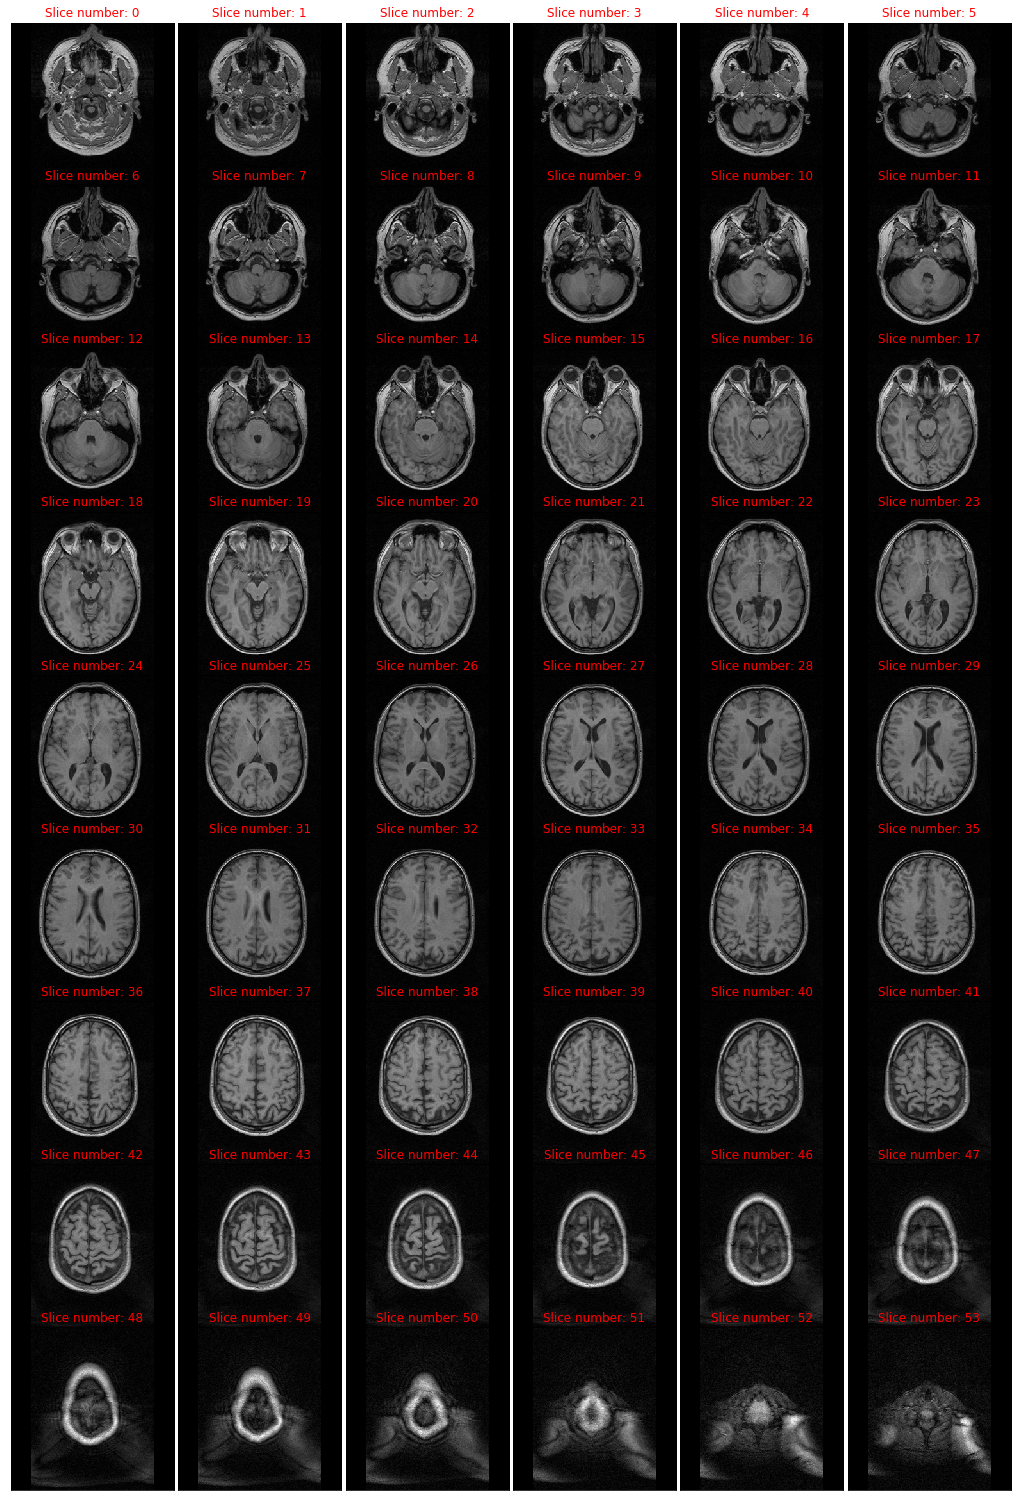

In [6]:
fig, axes = plt.subplots(9, 6, figsize=[18, 27])

for i, ax in enumerate(axes.flatten()):
    ax.imshow(data[:, :, i], 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Slice number: {}'.format(i), color='r')

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

**Analyze functional MRI images**

In [21]:
# Find all files in the data folder
data_path = './data/fM00223/'
files = os.listdir(data_path)

# Read in the data and organize it with respect to the acquisition parameters
data_all = []
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_data()
        data_all.append(data.squeeze())
data_all = np.array(data_all)

In [22]:
data_all.shape

(96, 64, 64, 64)

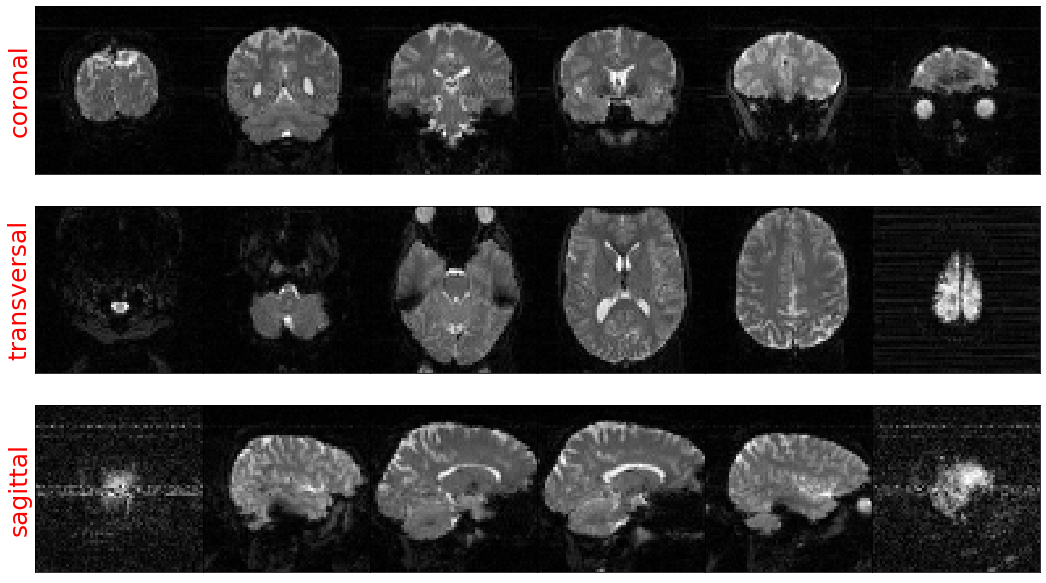

In [23]:
# Create a 3x6 subplot
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

# Orgaize the data for visualisation in the coronal plane
coronal = np.transpose(data_all, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane
transversal = np.transpose(data_all, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane
sagittal = np.transpose(data_all, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)

# Plot some of the images in different planes
n = 10
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n, 0], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 10

n = 5
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n, 0], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 10

n = 5
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n, 0], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n += 10

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

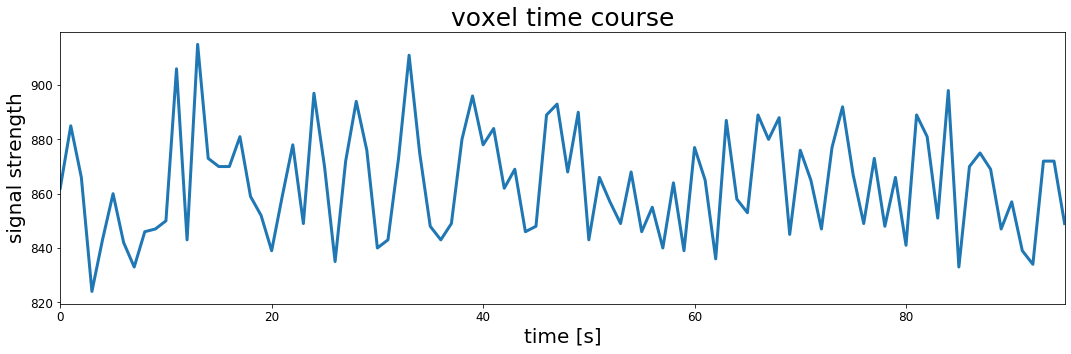

In [24]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# Plot the timecourse of a random voxel
ax.plot(transversal[30, 30, 35, :], lw=3)
ax.set_xlim([0, transversal.shape[3]-1])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()